In [3]:
import kagglehub
import pandas as pd
import numpy as np

path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

df_train = pd.read_csv(path+'\\train.csv')
df_test = pd.read_csv(path+'\\test.csv')

Path to dataset files: C:\Users\user\.cache\kagglehub\datasets\iabhishekofficial\mobile-price-classification\versions\1


In [4]:
df3 = df_train
df3

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


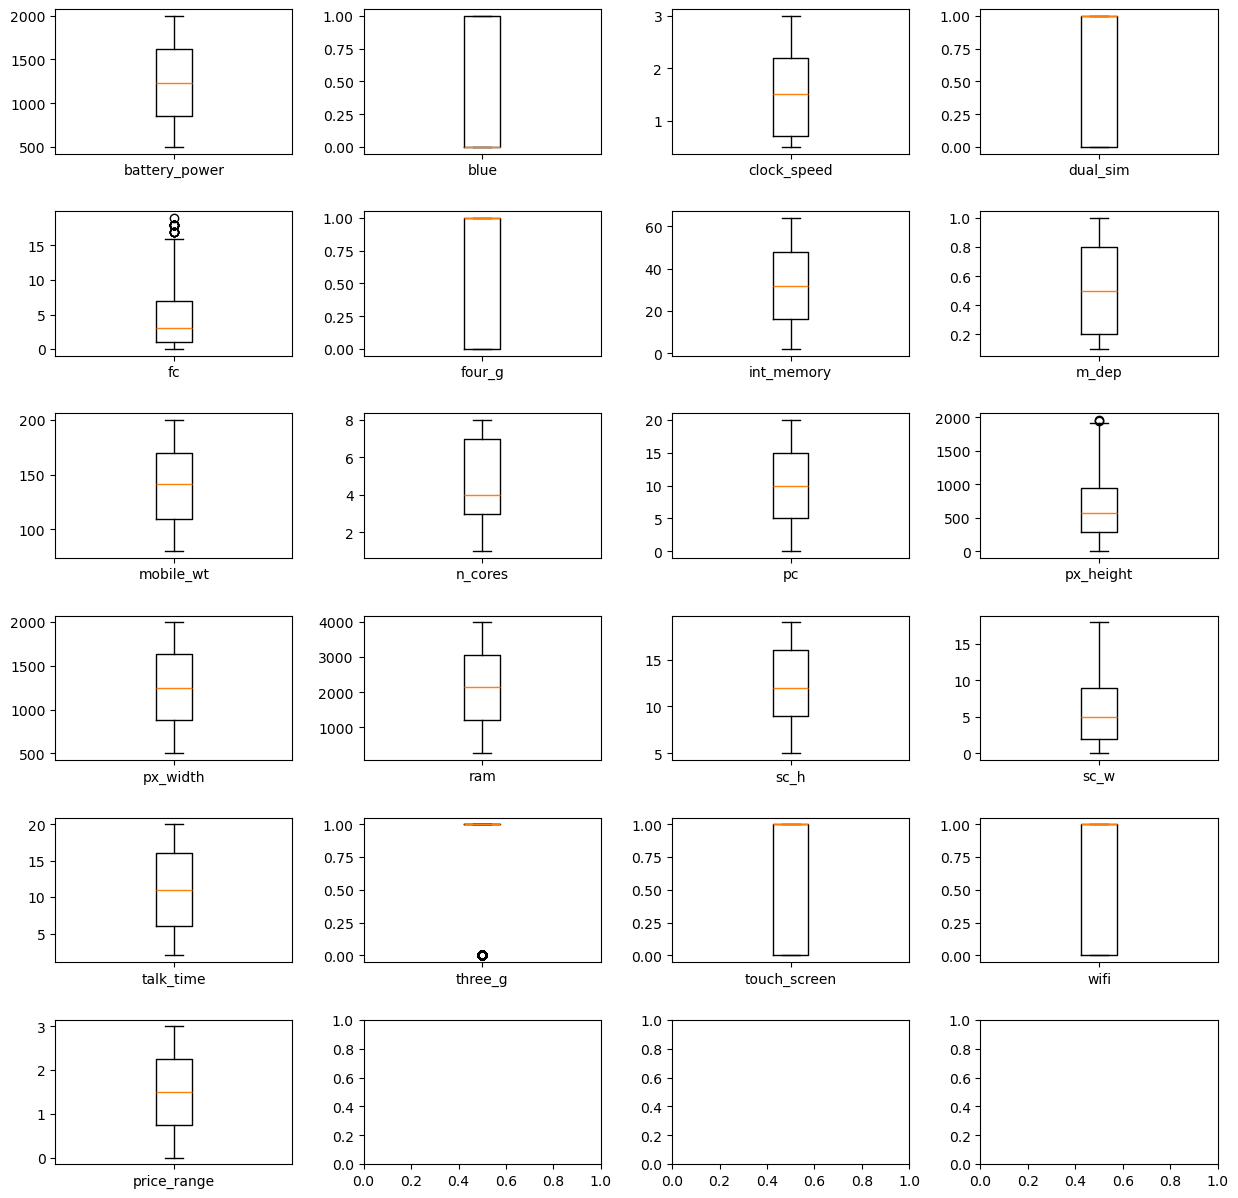

In [5]:
import matplotlib.pyplot as plt

labels = df3.columns.to_list()

fig, ax = plt.subplots(6, 4, figsize=(15, 15))
fig.subplots_adjust(hspace=0.4, wspace=0.3) 

for i in range(21):
    ax[i // 4, i % 4].boxplot(df3.loc[:,[labels[i]]], tick_labels = [labels[i]])

plt.show()

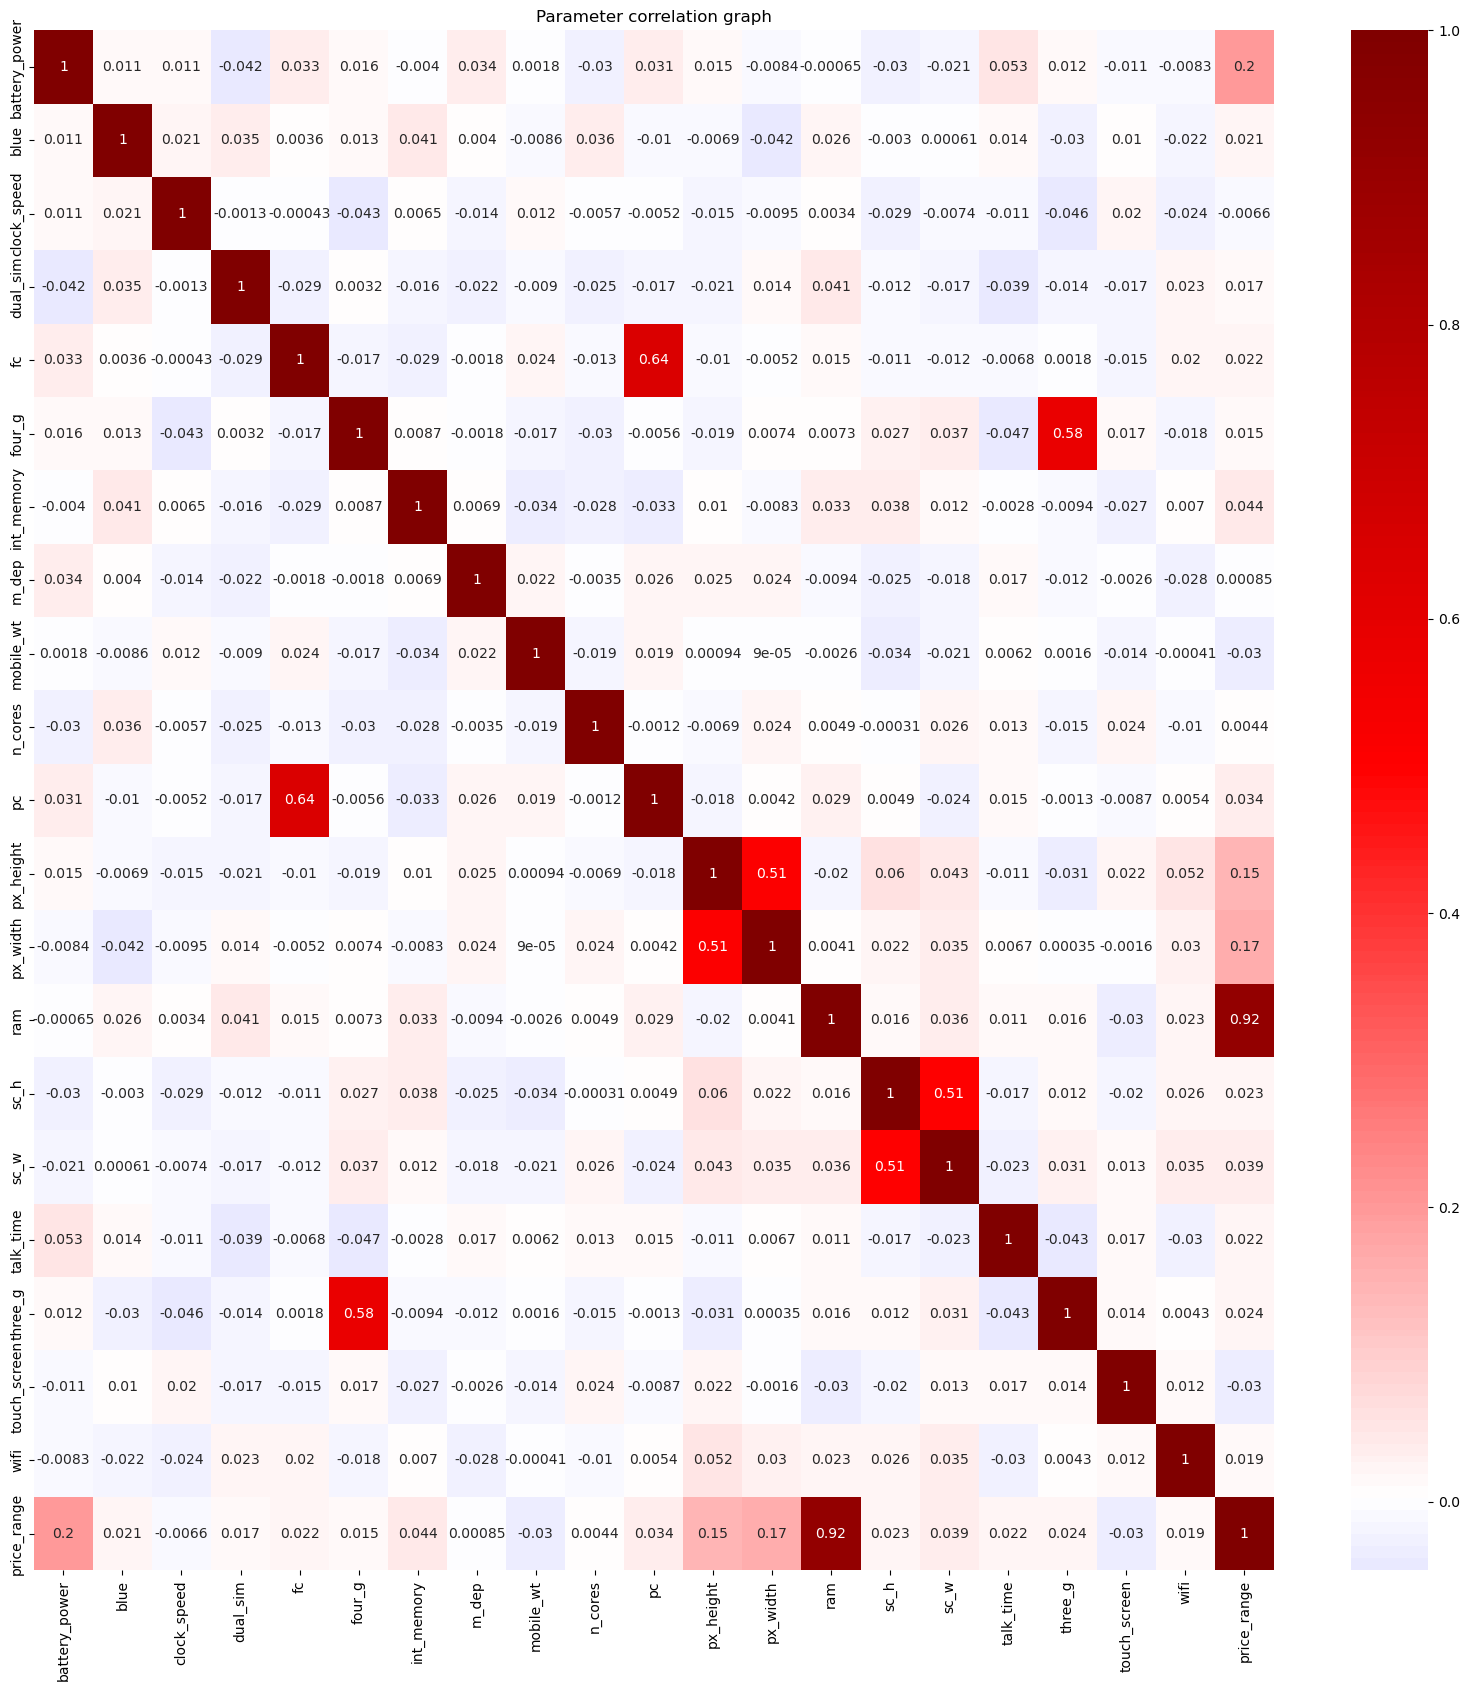

In [6]:
import seaborn as seaborn
plt.figure(figsize=(20, 20))
seaborn.heatmap(df3.corr(), annot=True, cmap='seismic', center=0)
plt.title('Parameter correlation graph')
plt.show()

In [7]:
list_col = df3.columns.to_list()

In [8]:
df3 = df3[['battery_power', 'px_height', 'px_width', 'ram', 'price_range']]
df3

,battery_power,px_height,px_width,ram,price_range
0,842,20,756,2549,1
1,1021,905,1988,2631,2
2,563,1263,1716,2603,2
3,615,1216,1786,2769,2
4,1821,1208,1212,1411,1
...,...,...,...,...,...
1995,794,1222,1890,668,0
1996,1965,915,1965,2032,2
1997,1911,868,1632,3057,3
1998,1512,336,670,869,0


In [9]:
from sklearn.model_selection import train_test_split

x = df3.loc[:,['battery_power', 'px_height', 'px_width', 'ram']].to_numpy()
y = df3.loc[:,['price_range']].to_numpy().flatten()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)

In [11]:
import tensorflow as tf
import keras

# Создаем модель
model = keras.Sequential([
    keras.layers.Dense(4, input_shape=(4,)),
    keras.layers.Dense(8),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(4, activation='softmax')
])

# Визуализируем архитектуру
model.summary()

# Компилируем модель
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Обучаем модель
model.fit(x_train, y_train, validation_split = 0.2, batch_size = 16, epochs = 1000, verbose = 0)

# Оценим точность модели
test_loss, test_acc = model.evaluate(x_test, y_test)
print('\nТестовая точность:', test_acc)

D:\zmei\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │              40 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 8)                   │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              36 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 168 (672.00 B)

 Trainable params: 168 (672.00 B)

 Non-trainable params: 0 (0.00 B)

D:\zmei\Lib\site-packages\keras\src\backend\tensorflow\nn.py:1214: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.2318 

Тестовая точность: 0.9800000190734863


In [13]:
f_predict = list(map(lambda x: x.argmax(), model.predict(x_train)[20:40]))
f_true = y_train[20:40]
for i in range(len(f_predict)):
    print(f'предикт: {f_predict[i]}, факт: {f_true[i]}, совпали? {f_predict[i] == f_true[i]}')

57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step
предикт: 3, факт: 3, совпали? True
предикт: 2, факт: 2, совпали? True
предикт: 3, факт: 3, совпали? True
предикт: 0, факт: 0, совпали? True
предикт: 0, факт: 0, совпали? True
предикт: 2, факт: 2, совпали? True
предикт: 1, факт: 1, совпали? True
предикт: 3, факт: 3, совпали? True
предикт: 0, факт: 0, совпали? True
предикт: 1, факт: 1, совпали? True
предикт: 2, факт: 2, совпали? True
предикт: 0, факт: 0, совпали? True
предикт: 2, факт: 2, совпали? True
предикт: 3, факт: 3, совпали? True
предикт: 1, факт: 2, совпали? False
предикт: 0, факт: 0, совпали? True
предикт: 1, факт: 1, совпали? True
предикт: 3, факт: 3, совпали? True
предикт: 3, факт: 3, совпали? True
предикт: 0, факт: 0, совпали? True
